# Introduction

#### Reference: [Kaggle - Students Performance in Exams](https://www.kaggle.com/code/chingchunyeh/students-performance-in-exams)

To know which factor may affect the student's performance, we classify the score into couple of ranks, and figure out which feature affects the score more significant. The independent variables are follow:

1. gender : sex of students
2. race/ethnicity : ethnicity of students
3. parental level of education : parents' final education
4. lunch : having lunch before test (normal or abnormal)
5. test preparation course : complete or not complete before test

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import os 
import warnings
warnings.filterwarnings("ignore")

### 1. Show top 5 records

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 2. Data checks to perform
- Check missing values
- Check duplicates
- Check data types
- Check the number of unique values for each column 
- Check statistics of dataset
- Check various categories present in different categorical columns

#### 3.1 Check missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### 3.2 Check duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

No duplictaes in this dataframe, If duplicate rows were these we could have used `df.drop_duplicates(inplace=True)` to delete duplicate rows.

#### 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check the number of unique values for each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Check statistics of dataset

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights
- From the above code we can see the means of the 3 variables are very close to each other - between 66 and 68.05.
- Std deviation of these variables are also close between 14.6 and 15.19.
- Minimum score for math is 0 but for reading and writing are non-zero and higher values of 17 and 10 respectively.

#### 3.6 Check various categories present in different categorical columns

In [10]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [11]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [12]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [13]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [14]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

Replace ' ' with '_' in the column names.

In [15]:
df.columns = df.columns.str.replace(' ', '_', regex=True)

In [16]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

Create a list of features if they are numerical or categorical features.

In [17]:
### if dtype is object, it is categorical
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['gender',
 'race/ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [18]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_features

['math_score', 'reading_score', 'writing_score']

Creating features - `total_score` and `avg_score`.

In [19]:
df['total_score'] = df['reading_score'] + df['writing_score'] + df['math_score']
df['average_score'] = np.round(df['total_score'] / 3)

In [20]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.0
4,male,group C,some college,standard,none,76,78,75,229,76.0


Check number of students who got full score in reading, math, writing, total and average score.

In [21]:
print("Number of students with full marks in reading: ", df[df['reading_score'] == 100].shape[0]) 
print("Number of students with full marks in math: ", df[df['math_score'] == 100].shape[0]) 
print("Number of students with full marks in writing: ", df[df['writing_score'] == 100].shape[0]) 

Number of students with full marks in reading:  17
Number of students with full marks in math:  7
Number of students with full marks in writing:  14


In [22]:
print("Number of students with full marks in total_score: ", df[df['total_score'] == 100].shape[0])
print("Number of students with full marks in average score: ", df[df['average_score'] == 100].shape[0])

Number of students with full marks in total_score:  0
Number of students with full marks in average score:  4


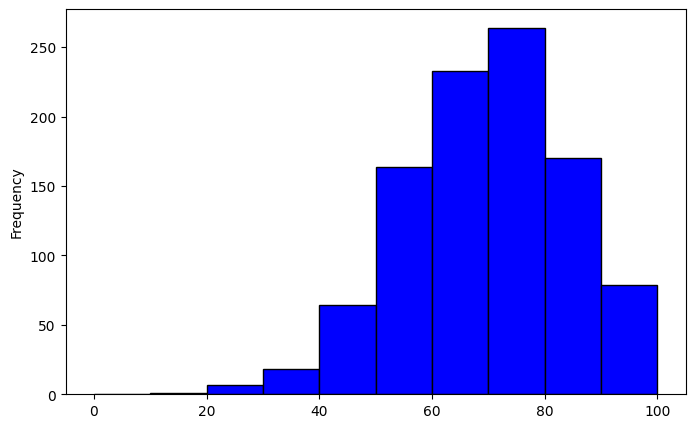

In [23]:
df['reading_score'].plot(kind='hist', figsize=(8, 5), color='blue', edgecolor='black', bins=np.arange(0, 101, 10));

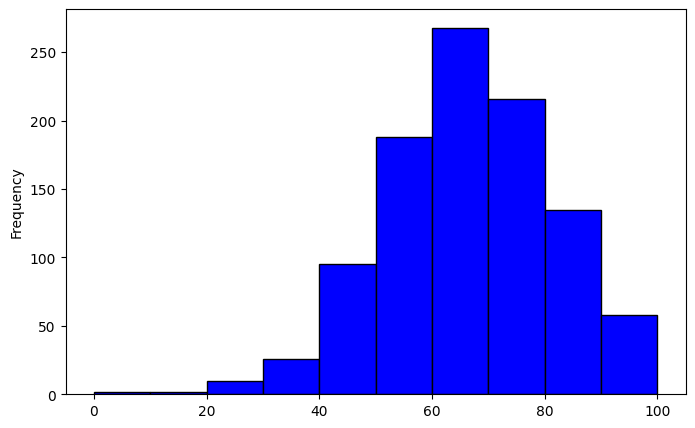

In [24]:
df['math_score'].plot(kind='hist', figsize=(8, 5), color='blue', edgecolor='black', bins=np.arange(0, 101, 10));

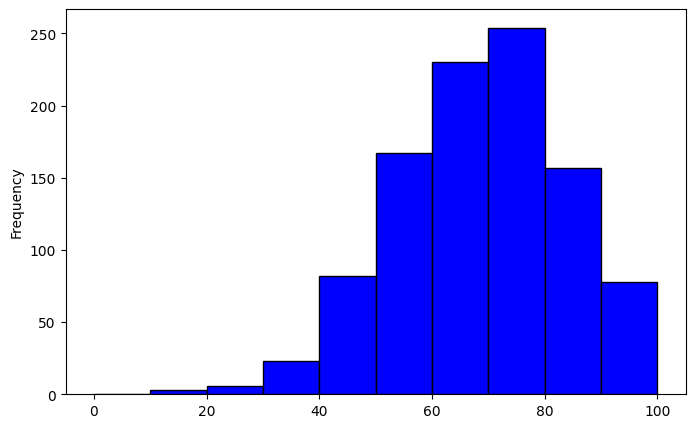

In [25]:
df['writing_score'].plot(kind='hist', figsize=(8, 5), color='blue', edgecolor='black', bins=np.arange(0, 101, 10));

In [26]:
print("Number of students with reading_score <= 20: ", df[df['reading_score'] <= 20].shape[0])
print("Number of students with math_score <= 20: ", df[df['math_score'] <= 20].shape[0])
print("Number of students with writing_score <= 20: ", df[df['writing_score'] <= 20].shape[0])

Number of students with reading_score <= 20:  1
Number of students with math_score <= 20:  4
Number of students with writing_score <= 20:  3


#### Insights from above
1. Majority of students marks concentrated in 60 to 80 range.
2. Maths has the lowest performers with 4 students having score <= 20.

## 4. EDA

### 4.1 Histogram and KDE

#### Distribution of average score

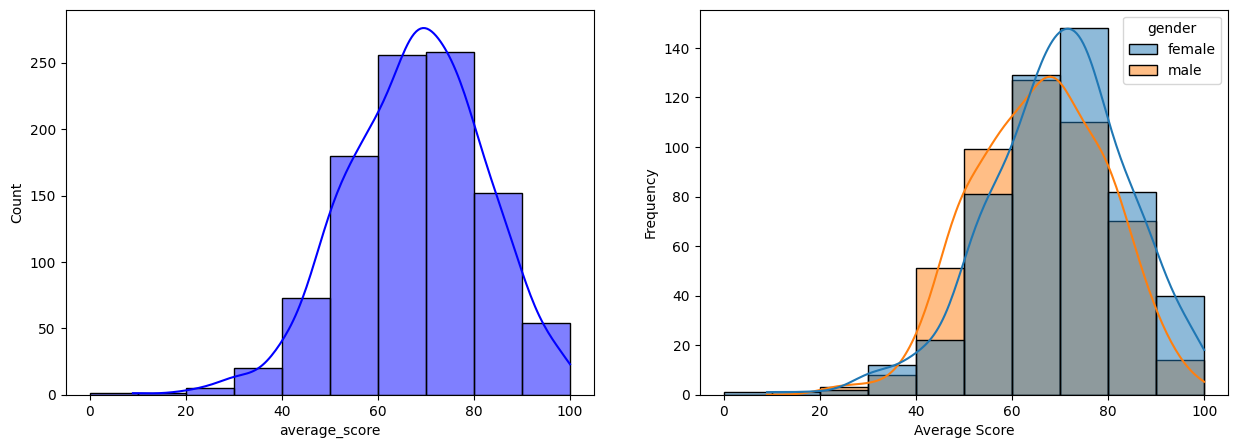

In [27]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'average_score', kde=True, color='blue', bins=np.arange(0, 101, 10))
plt.subplot(1,2,2)
sns.histplot(data = df, x = 'average_score', kde = True, hue='gender', bins=np.arange(0, 101, 10))
plt.xlabel('Average Score')
plt.ylabel('Frequency')
# plt.title('Distribution of Average Score')
plt.show();

#### Distribution of total score

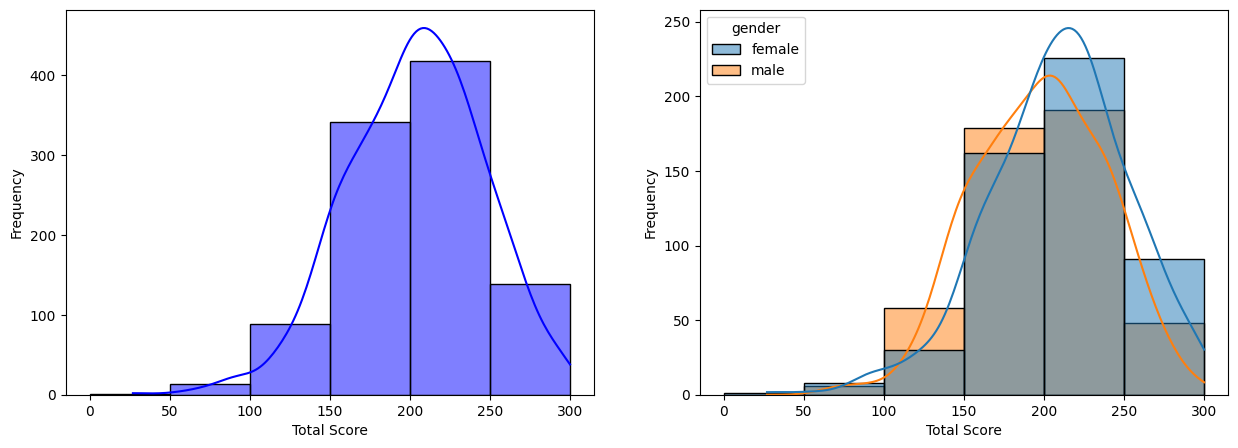

In [28]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
plt.subplot(1,2,1)
sns.histplot(data = df, x = 'total_score', kde=True, color='blue', bins=np.arange(0, 301, 50))
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
sns.histplot(data = df, x = 'total_score', kde = True, hue='gender', bins=np.arange(0, 301, 50))
plt.xlabel('Total Score')
plt.ylabel('Frequency')
# plt.title('Distribution of Average Score')
plt.show();

Based on the above distribution, we can see that the girls out-perform boys.

#### Distribution of the average and total score when the hue is lunch.

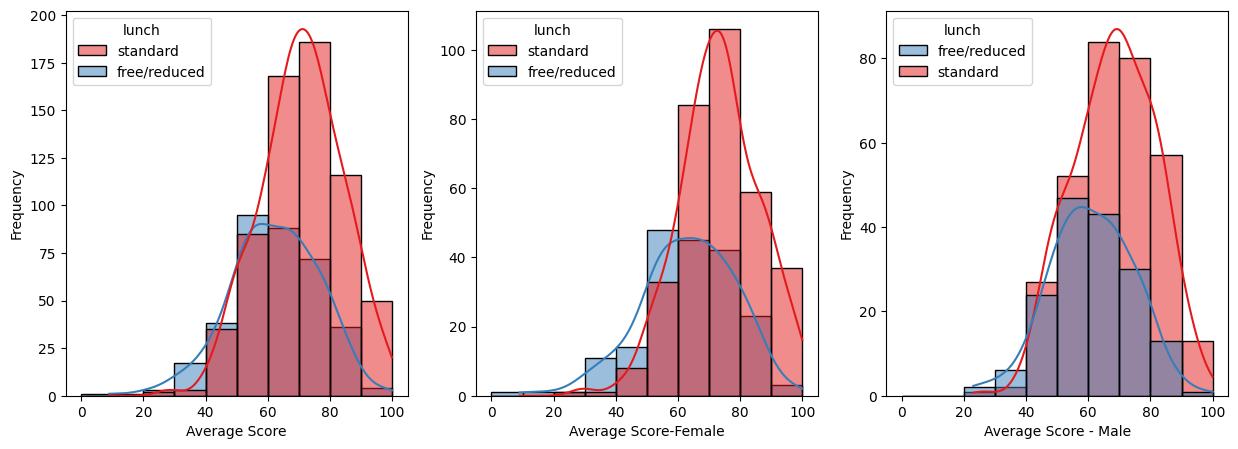

In [29]:
# Get unique lunch categories and assign colors
lunch_categories = df['lunch'].unique()
palette = dict(zip(lunch_categories, sns.color_palette("Set1", n_colors=len(lunch_categories))))
# Plotting average score distribution by lunch category
fig, axes = plt.subplots(1,3, figsize=(15, 5))
plt.subplot(1,3,1)
sns.histplot(data = df, x = 'average_score', kde = True, hue='lunch', bins=np.arange(0, 101, 10),  palette=palette)
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.subplot(1,3,2)
sns.histplot(data = df.loc[df['gender']=='female',:], x = 'average_score', kde = True, hue='lunch', bins=np.arange(0, 101, 10), palette=palette)
plt.xlabel('Average Score-Female')
plt.ylabel('Frequency')
plt.subplot(1,3,3)
sns.histplot(data = df.loc[df['gender']=='male',:], x = 'average_score', kde = True, hue='lunch', bins=np.arange(0, 101, 10), palette=palette)
plt.xlabel('Average Score - Male')
plt.ylabel('Frequency')
plt.show();

We can observe that the people with standard lunch always outperform those with free/reduced lunch.

Or we can create our own custom paletter and assign it:

```
# Define your own colors for each lunch category
custom_palette = {
    'standard': '#1f77b4',      # blue
    'free/reduced': '#ff7f0e'   # orange
}

sns.histplot(data=df, x='average_score', kde=True, hue='lunch', bins=np.arange(0, 101, 10), palette=custom_palette)
```

#### Distribution of the average and total score when the hue is parental_level_of_education.

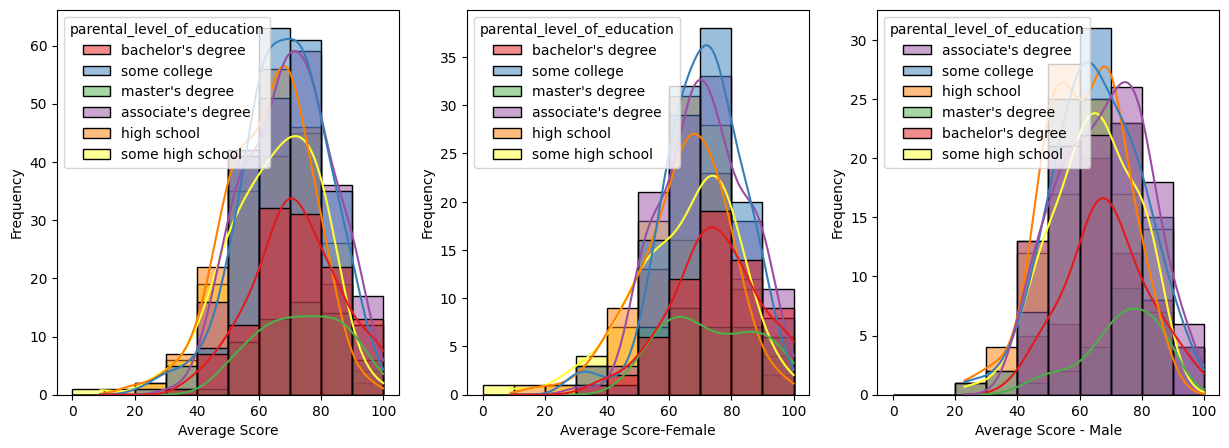

In [32]:
# Get parental_level_of_education lunch categories and assign colors
parental_level_of_education_categories = df['parental_level_of_education'].unique()
palette = dict(zip(parental_level_of_education_categories, sns.color_palette("Set1", n_colors=len(parental_level_of_education_categories))))
# Plotting average score distribution by lunch category
fig, axes = plt.subplots(1,3, figsize=(15, 5))
plt.subplot(1,3,1)
sns.histplot(data = df, x = 'average_score', kde = True, hue='parental_level_of_education', bins=np.arange(0, 101, 10),  palette=palette)
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.subplot(1,3,2)
sns.histplot(data = df.loc[df['gender']=='female',:], x = 'average_score', kde = True, hue='parental_level_of_education', bins=np.arange(0, 101, 10), palette=palette)
plt.xlabel('Average Score-Female')
plt.ylabel('Frequency')
plt.subplot(1,3,3)
sns.histplot(data = df.loc[df['gender']=='male',:], x = 'average_score', kde = True, hue='parental_level_of_education', bins=np.arange(0, 101, 10), palette=palette)
plt.xlabel('Average Score - Male')
plt.ylabel('Frequency')
plt.show();


##### Insights
- In general, parent's education dont help student perform well in exam.

#### Distribution of the average and total score when the hue is race/ethnicity.

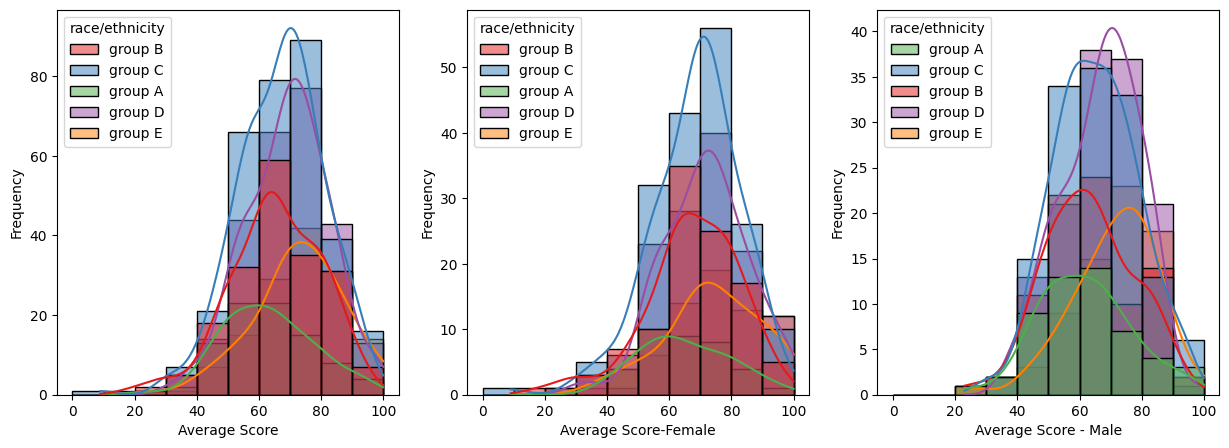

In [34]:
# Get parental_level_of_education lunch categories and assign colors
race_categories = df['race/ethnicity'].unique()
palette = dict(zip(race_categories, sns.color_palette("Set1", n_colors=len(race_categories))))
# Plotting average score distribution by lunch category
fig, axes = plt.subplots(1,3, figsize=(15, 5))
plt.subplot(1,3,1)
sns.histplot(data = df, x = 'average_score', kde = True, hue='race/ethnicity', bins=np.arange(0, 101, 10),  palette=palette)
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.subplot(1,3,2)
sns.histplot(data = df.loc[df['gender']=='female',:], x = 'average_score', kde = True, hue='race/ethnicity', bins=np.arange(0, 101, 10), palette=palette)
plt.xlabel('Average Score-Female')
plt.ylabel('Frequency')
plt.subplot(1,3,3)
sns.histplot(data = df.loc[df['gender']=='male',:], x = 'average_score', kde = True, hue='race/ethnicity', bins=np.arange(0, 101, 10), palette=palette)
plt.xlabel('Average Score - Male')
plt.ylabel('Frequency')
plt.show();


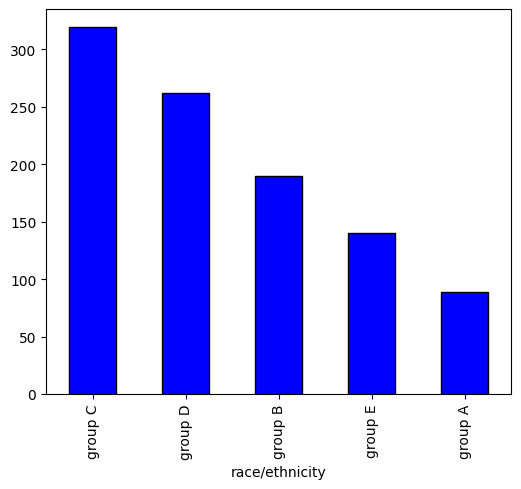

In [36]:
df['race/ethnicity'].value_counts().plot(kind='bar', figsize=(6, 5), color='blue', edgecolor='black');

In [41]:
df.groupby(by=['race/ethnicity', 'gender'], as_index=False)['average_score'].mean().sort_values(by=['race/ethnicity', 'gender'], ascending=False)

,race/ethnicity,gender,average_score
9,group E,male,71.450704
8,group E,female,74.014493
7,group D,male,66.984962
6,group D,female,71.441860
5,group C,male,65.223022
4,group C,female,68.588889
3,group B,male,62.988372
2,group B,female,67.548077
1,group A,male,61.509434
0,group A,female,65.083333


##### Insights
- Maximum number of children are from Group C.
- Group E is the group with the best `average_score`.

#### Distribution of the average and total score when the hue is test_preparation_course.


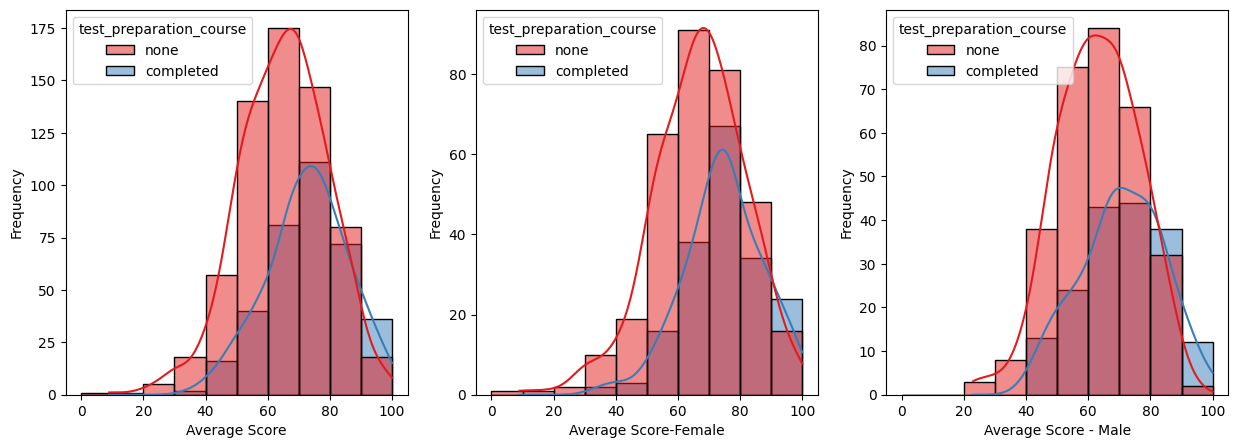

In [50]:
# Get parental_level_of_education lunch categories and assign colors
race_categories = df['test_preparation_course'].unique()
palette = dict(zip(race_categories, sns.color_palette("Set1", n_colors=len(race_categories))))
# Plotting average score distribution by lunch category
fig, axes = plt.subplots(1,3, figsize=(15, 5))
plt.subplot(1,3,1)
sns.histplot(data = df, x = 'average_score', kde = True, hue='test_preparation_course', bins=np.arange(0, 101, 10),  palette=palette)
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.subplot(1,3,2)
sns.histplot(data = df.loc[df['gender']=='female',:], x = 'average_score', kde = True, hue='test_preparation_course', bins=np.arange(0, 101, 10), palette=palette)
plt.xlabel('Average Score-Female')
plt.ylabel('Frequency')
plt.subplot(1,3,3)
sns.histplot(data = df.loc[df['gender']=='male',:], x = 'average_score', kde = True, hue='test_preparation_course', bins=np.arange(0, 101, 10), palette=palette)
plt.xlabel('Average Score - Male')
plt.ylabel('Frequency')
plt.show();


Many of the students have not taken the test_preparaton_course but those who have taken have got good scores.

### 4.2 Violin plot
#### Maximum score of all students in all 3 subjects.

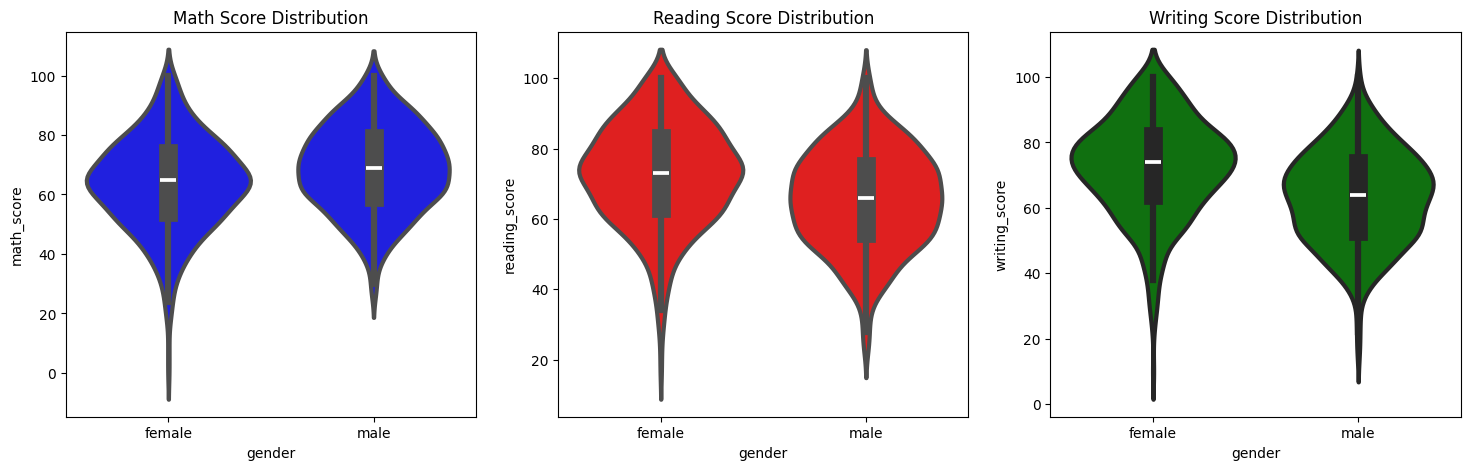

In [44]:
fig, axes = plt.subplots(1,3, figsize=(18, 5))
plt.subplot(1,3,1)
sns.violinplot(data=df, y = 'math_score', x = 'gender', color = 'blue', linewidth=3)
plt.title('Math Score Distribution')
plt.subplot(1,3,2)
sns.violinplot(data=df, y = 'reading_score',x = 'gender',color='red', linewidth=3)
plt.title('Reading Score Distribution') 
plt.subplot(1,3,3)
sns.violinplot(data=df, y = 'writing_score',x = 'gender',color='green', linewidth=3)  
plt.title('Writing Score Distribution')
plt.show();

- From the above we can see most of the students score in between 60 and 80 in math but for reading and writing most of them score between 50 and 80.
- Also, on adding gender to the graphs we can see male have higher median math_score and females have higher mediam reading and writing sore.

#### Boxplot to check for outliers

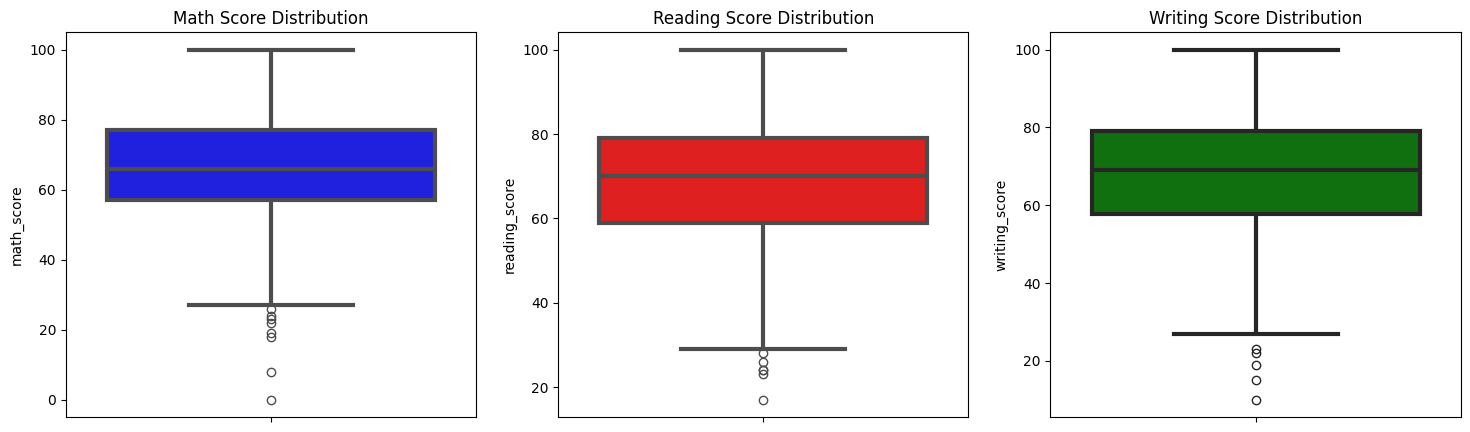

In [45]:
fig, axes = plt.subplots(1,3, figsize=(18, 5))
plt.subplot(1,3,1)
sns.boxplot(data=df, y = 'math_score', color = 'blue', linewidth=3)
plt.title('Math Score Distribution')
plt.subplot(1,3,2)
sns.boxplot(data=df, y = 'reading_score',color='red', linewidth=3)
plt.title('Reading Score Distribution') 
plt.subplot(1,3,3)
sns.boxplot(data=df, y = 'writing_score',color='green', linewidth=3)  
plt.title('Writing Score Distribution')
plt.show();

### Multivariate analysis using pairplot

<Figure size 1000x600 with 0 Axes>

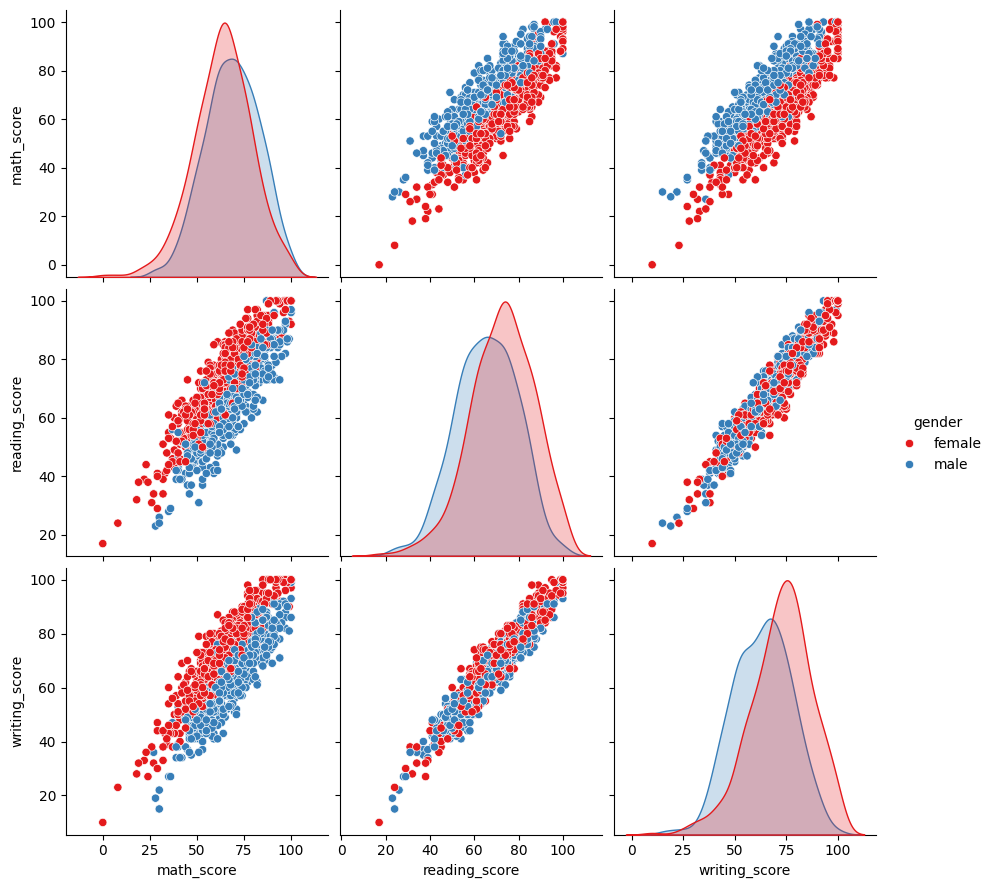

In [48]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='gender', vars=['math_score', 'reading_score', 'writing_score'], palette='Set1', height=3)

From the above graph its clear that all scores increase linearly w.r.t each other.

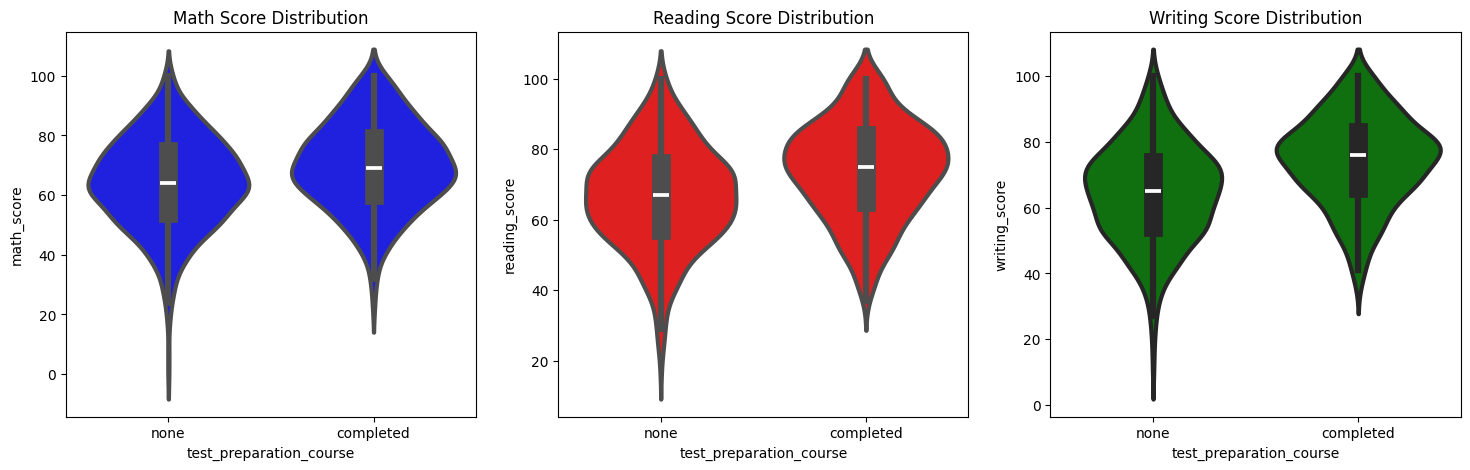

In [51]:
fig, axes = plt.subplots(1,3, figsize=(18, 5))
plt.subplot(1,3,1)
sns.violinplot(data=df, y = 'math_score', x = 'test_preparation_course', color = 'blue', linewidth=3)
plt.title('Math Score Distribution')
plt.subplot(1,3,2)
sns.violinplot(data=df, y = 'reading_score',x = 'test_preparation_course',color='red', linewidth=3)
plt.title('Reading Score Distribution') 
plt.subplot(1,3,3)
sns.violinplot(data=df, y = 'writing_score',x = 'test_preparation_course',color='green', linewidth=3)  
plt.title('Writing Score Distribution')
plt.show();

Those who have completed have got a higher median score.

## Conclusions:
1. Student's performance is linked with lunch, race, parental level of education and test preparation course.
2. Females lead in pass percentage and are also top scorers.